In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("datasets/dataset_sentiments.csv")

In [4]:
dataset

,title_f,title_r,sentiment_f_transformers,sentiment_r_transformers,sentiment_f_textblob,sentiment_r_textblob,sentiment_f_natural,sentiment_r_natural,sentiment_f_sentiment,sentiment_r_sentiment,heuristics
0,Bill Gates: “I think Donald Trump will go down...,"No, Bill Gates didn't tweet Donald Trump will ...",POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,True
1,Obama Orders Life-Sized Bronze Statute of Hims...,"No, Former President Obama Didn't Build a Stat...",POSITIVE,NEGATIVE,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVE,True
2,MITT ROMNEY: ‘TRUMP HAS SOME VERY SERIOUS EMOT...,NOT REAL NEWS: Mitt Romney did not call on Tru...,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,False
3,FDA Announced That Vaccines Are Causing Autism,FDA did not issue new statement on vaccines an...,NEGATIVE,NEGATIVE,NEGATIVE,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,False
4,Melania Trump Hired Exorcist To ‘Cleanse White...,First lady did not hire exorcist for White House,NEGATIVE,NEGATIVE,NEGATIVE,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,False
...,...,...,...,...,...,...,...,...,...,...,...
439,Bowe Bergdahl wanders off during court-martial...,"No, Bowe Bergdahl didn't wander off during court",NEGATIVE,NEGATIVE,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVE,True
440,ISIS Lays Down Arms After Katy Perry’s Impassi...,"No, ISIS didn't lay down its arms after Katy P...",NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,NEUTRAL,POSITIVE,True
441,International Arrest Warrant Issued for George...,The Russian Government did not issue an arrest...,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,False
442,Police Discover Meth Lab In Back Room of Alaba...,Meth lab in Walmart bathroom? Not the oddest p...,NEGATIVE,POSITIVE,NEUTRAL,NEUTRAL,POSITIVE,NEUTRAL,NEUTRAL,NEUTRAL,False


In [5]:
pd.set_option('future.no_silent_downcasting', True)
for k in dataset.keys():
    dataset[k] = dataset[k].replace({"POSITIVE" : 1, "NEUTRAL" : 0, "NEGATIVE" : -1})

In [6]:
dataset

,title_f,title_r,sentiment_f_transformers,sentiment_r_transformers,sentiment_f_textblob,sentiment_r_textblob,sentiment_f_natural,sentiment_r_natural,sentiment_f_sentiment,sentiment_r_sentiment,heuristics
0,Bill Gates: “I think Donald Trump will go down...,"No, Bill Gates didn't tweet Donald Trump will ...",1,-1,-1,-1,1,-1,1,1,True
1,Obama Orders Life-Sized Bronze Statute of Hims...,"No, Former President Obama Didn't Build a Stat...",1,-1,0,0,0,0,0,-1,True
2,MITT ROMNEY: ‘TRUMP HAS SOME VERY SERIOUS EMOT...,NOT REAL NEWS: Mitt Romney did not call on Tru...,-1,-1,1,1,-1,1,-1,-1,False
3,FDA Announced That Vaccines Are Causing Autism,FDA did not issue new statement on vaccines an...,-1,-1,-1,0,0,0,0,0,False
4,Melania Trump Hired Exorcist To ‘Cleanse White...,First lady did not hire exorcist for White House,-1,-1,-1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
439,Bowe Bergdahl wanders off during court-martial...,"No, Bowe Bergdahl didn't wander off during court",-1,-1,0,0,0,0,0,-1,True
440,ISIS Lays Down Arms After Katy Perry’s Impassi...,"No, ISIS didn't lay down its arms after Katy P...",-1,-1,1,1,1,-1,0,1,True
441,International Arrest Warrant Issued for George...,The Russian Government did not issue an arrest...,-1,-1,1,1,-1,1,-1,-1,False
442,Police Discover Meth Lab In Back Room of Alaba...,Meth lab in Walmart bathroom? Not the oddest p...,-1,1,0,0,1,0,0,0,False


In [7]:
def polarity_pairs_evaluator(k1,k2):
    counter_opposite_polarity = 0
    counter_equals_polarity = 0
    counter_neutral_polarity = 0
    counter_both_positive = 0
    counter_both_negative = 0
    counter_both_neutral = 0
    for item in dataset.iterrows():
        if item[1][k1] + item[1][k2] == 0 and item[1][k1] != item[1][k2]:
            counter_opposite_polarity += 1
        elif item[1][k1] == item[1][k2]:
            counter_equals_polarity += 1
        else:
            counter_neutral_polarity += 1
        
        if item[1][k1] + item[1][k2] == 2:
            counter_both_positive += 1
        elif item[1][k1] + item[1][k2] == -2:
            counter_both_negative += 1
        elif item[1][k1] == item[1][k2] == 0 :
            counter_both_neutral += 1
            
            
    
    return counter_opposite_polarity, counter_equals_polarity, counter_neutral_polarity, counter_both_positive, counter_both_negative, counter_both_neutral
        


In [8]:
dataset.keys()

Index(['title_f', 'title_r', 'sentiment_f_transformers',
       'sentiment_r_transformers', 'sentiment_f_textblob',
       'sentiment_r_textblob', 'sentiment_f_natural', 'sentiment_r_natural',
       'sentiment_f_sentiment', 'sentiment_r_sentiment', 'heuristics'],
      dtype='object')

In [9]:
opposite, equals, one_neutral, b_neg, b_pos, b_neu =  polarity_pairs_evaluator('sentiment_f_transformers', 'sentiment_r_transformers')
print("Transformer \n--------------")
print("Opposite: "+str(opposite))
print("Equals: "+str(equals))
print("Neutral: "+str(one_neutral))
print("Both Negative: "+str(b_neg))
print("Both Positive: "+str(b_pos))
print("Both Neutral: "+str(b_neu))

Transformer 
--------------
Opposite: 157
Equals: 287
Neutral: 0
Both Negative: 9
Both Positive: 278
Both Neutral: 0


In [10]:
opposite, equals, one_neutral, b_neg, b_pos, b_neu =  polarity_pairs_evaluator('sentiment_f_textblob', 'sentiment_r_textblob')
print("TextBlob \n--------------")
print("Opposite: "+str(opposite))
print("Equals: "+str(equals))
print("Neutral: "+str(one_neutral))
print("Both Negative: "+str(b_neg))
print("Both Positive: "+str(b_pos))
print("Both Neutral: "+str(b_neu))

TextBlob 
--------------
Opposite: 57
Equals: 177
Neutral: 210
Both Negative: 56
Both Positive: 30
Both Neutral: 91


In [11]:
opposite, equals, one_neutral, b_neg, b_pos, b_neu =  polarity_pairs_evaluator('sentiment_f_natural', 'sentiment_r_natural')
print("Natural \n--------------")
print("Opposite: "+str(opposite))
print("Equals: "+str(equals))
print("Neutral: "+str(one_neutral))
print("Both Negative: "+str(b_neg))
print("Both Positive: "+str(b_pos))
print("Both Neutral: "+str(b_neu))

Natural 
--------------
Opposite: 132
Equals: 189
Neutral: 123
Both Negative: 21
Both Positive: 127
Both Neutral: 41


In [12]:
opposite, equals, one_neutral, b_neg, b_pos, b_neu  =  polarity_pairs_evaluator('sentiment_f_sentiment', 'sentiment_r_sentiment')
print("Sentiment \n--------------")
print("Opposite: "+str(opposite))
print("Equals: "+str(equals))
print("Neutral: "+str(one_neutral))
print("Both Negative: "+str(b_neg))
print("Both Positive: "+str(b_pos))
print("Both Neutral: "+str(b_neu))

Sentiment 
--------------
Opposite: 46
Equals: 228
Neutral: 170
Both Negative: 15
Both Positive: 145
Both Neutral: 68


<h2> Considering all sentiment scores as unique value (sum) in range [-4,4]</h2>

In [13]:
sentiment_f_global = []
sentiment_r_global = []

for item in dataset.iterrows():
    sentiment_f_global.append(item[1].sentiment_f_sentiment + item[1].sentiment_f_textblob + item[1].sentiment_f_natural + item[1].sentiment_f_transformers)
    sentiment_r_global.append(item[1].sentiment_r_sentiment + item[1].sentiment_r_textblob + item[1].sentiment_r_natural + item[1].sentiment_r_transformers)
    
dataset['sentiment_f_global'] = sentiment_f_global
dataset['sentiment_r_global'] = sentiment_r_global

In [14]:
dataset[['sentiment_f_global','sentiment_r_global']]

,sentiment_f_global,sentiment_r_global
0,2,-2
1,1,-2
2,-2,0
3,-2,-1
4,-2,-1
...,...,...
439,-1,-2
440,1,0
441,-2,0
442,0,1


In [15]:
# Compute distance betweeen real and fake global sentiments in absolute value
frequency_distance = {"8":0, "7":0, "6":0, "5":0, "4":0, "3":0, "2":0, "1":0, "0":0}
for item in dataset.iterrows():
    frequency_distance[str(abs(item[1]["sentiment_f_global"] - item[1]["sentiment_r_global"]))] +=1
print(frequency_distance)

{'8': 4, '7': 10, '6': 15, '5': 36, '4': 45, '3': 71, '2': 101, '1': 94, '0': 68}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


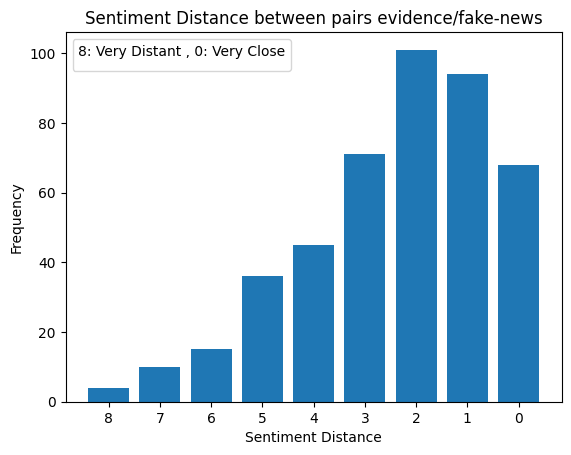

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = frequency_distance.keys()
y = frequency_distance.values()
ax.bar(x, y)
ax.set_xlabel('Sentiment Distance')
ax.set_ylabel('Frequency')
ax.set_title('Sentiment Distance between pairs evidence/fake-news')
ax.legend(title='8: Very Distant , 0: Very Close')

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("sentiment_distance.png")

In [17]:
frequency_sentiment_fake = {"-4":0, "-3":0, "-2":0, "-1":0, "0":0, "1":0, "2":0, "3":0, "4":0}
for item in dataset.iterrows():
    frequency_sentiment_fake[str(item[1]["sentiment_f_global"])] +=1
print(frequency_sentiment_fake)

{'-4': 18, '-3': 59, '-2': 112, '-1': 62, '0': 63, '1': 54, '2': 42, '3': 22, '4': 12}


In [18]:
frequency_sentiment_real = {"-4":0, "-3":0, "-2":0, "-1":0, "0":0, "1":0, "2":0, "3":0, "4":0}
for item in dataset.iterrows():
    frequency_sentiment_real[str(item[1]["sentiment_r_global"])] +=1
print(frequency_sentiment_real)

{'-4': 43, '-3': 121, '-2': 103, '-1': 75, '0': 51, '1': 22, '2': 19, '3': 6, '4': 4}


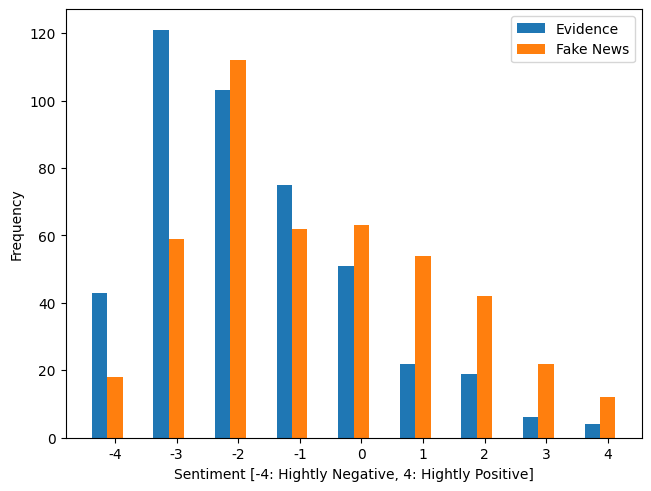

<Figure size 640x480 with 0 Axes>

In [22]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = frequency_sentiment_fake.keys()
penguin_means = {
    'Evidence': frequency_sentiment_real.values(),
    'Fake News': frequency_sentiment_fake.values()
}
bar_labels = ['red', 'blue']
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x + width, species)
ax.set_xlabel('Sentiment [-4: Hightly Negative, 4: Hightly Positive]')
ax.set_ylabel('Frequency')
ax.set_title('')
ax.legend(title='')

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("sentiment_frequency.png")

<h2>"Per motivare il sentiment negativo delle real news, verifichiamo la presenza delle euristiche"</h2>


In [175]:
len(dataset[dataset["heuristics"]== True])

236